# <center>Titanic - Machine Learning from Disaster : Survival Prediction<center>

-- Author : Samrat Kundu

- LinkedIn: https://www.linkedin.com/in/samratk97/

# <font color='lightblue'>Summary:</font>

> "This is a Machine Learning Classification Project on the dataset from [Kaggle](https://www.kaggle.com/)'s one of the best competitions, [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic). I have analyzed and visualized the data, and created a Machine Learning model that predicts whether a person will survive or not.

- By doing this project, I've learned a lot about building predictive classification models using Python along with various libraries/modules. I've tried my best to find insights from the raw data and have communicated them in a clear and compelling manner."


<h1 class='imports', id='imports'> Imports </h1>

## the Libraries/Modules

In [1]:
# for data manipulation
import pandas as pd 
import numpy as np 

# for data visualization
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns 

# for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, \
                                    GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer

# models we are going to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# model accuracy
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, make_scorer, \
                            classification_report

# to prevent warnings
import warnings
warnings.filterwarnings('ignore')
# to color any text
from termcolor import colored

# Set the global random seed
np.random.seed(0)

## Import the Data

In [2]:
# train set
train = pd.read_csv('/kaggle/input/titanic/train.csv')
# test set
test = pd.read_csv('/kaggle/input/titanic/test.csv')

print(f"""
The shape of the Train Data Set : {train.shape}
The Shape of the Test Data Set : {test.shape}
""")

- Test data doesn't have the target column `Survived` that is why it is 11 out of 12

In [4]:
# first five rows of train 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# first five rows of test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h6>Data Dictionary</h6>

- `Survived` = Survival	| 0 = No, 1 = Yes
- `pclass` = Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
- `sex` = Sex	
- `Age` = Age in years	
- `sibsp`	= No. of siblings / spouses aboard the Titanic	
- `parch`	= No. of parents / children aboard the Titanic	
- `ticket` = Ticket number	
- `fare` = Passenger fare	
- `cabin`	= Cabin number	
- `embarked` = Port of Embarkation  |  C = Cherbourg, Q = Queenstown, S = Southampton

# Data Cleaning

- Check Null values for both `train` and `test`

In [6]:
print('Train Data\n')
print(train.isna().sum())
print('-'*50)
print('\nTest Data\n')
print(test.isna().sum())

Train Data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------

Test Data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<h3> Observation and Action </h3>

<h5>For Train Data:</h5>

- Only `Age`, `Cabin` and `Embarked` have null values and out of this `Cabin` has the highest number of null values which is approximatly more than 70 percent of the total rows.
- In this situation we can not fill the null values because it will make our model more biased.
- For train Data we will Drop the column `Cabin` and replace the null values in `Age` and `Embarked` by various statistical methods.

<h5>For Test Data:</h5>

- It is Very similar to Train Data. `Cabin` has the highest no. of null values, hence we will drop the column.
- For `Age` and `Fare` we can use Mean or Median to replace the Null values.

- Let's drop the `Cabin` column first from train and test.

In [7]:
train = train.drop(columns='Cabin')
test = test.drop(columns='Cabin')

- Now handle the missing values in `Age` column for both train and test.

In [8]:
# statistical view of the age from both train and test
print(pd.DataFrame(train['Age'].describe()).rename(columns={'Age': 'Train-Age'}).T)
print('-'*80)
print(pd.DataFrame(test['Age'].describe()).rename(columns={'Age': 'Test-Age'}).T)


           count       mean        std   min     25%   50%   75%   max
Train-Age  714.0  29.699118  14.526497  0.42  20.125  28.0  38.0  80.0
--------------------------------------------------------------------------------
          count      mean        std   min   25%   50%   75%   max
Test-Age  332.0  30.27259  14.181209  0.17  21.0  27.0  39.0  76.0


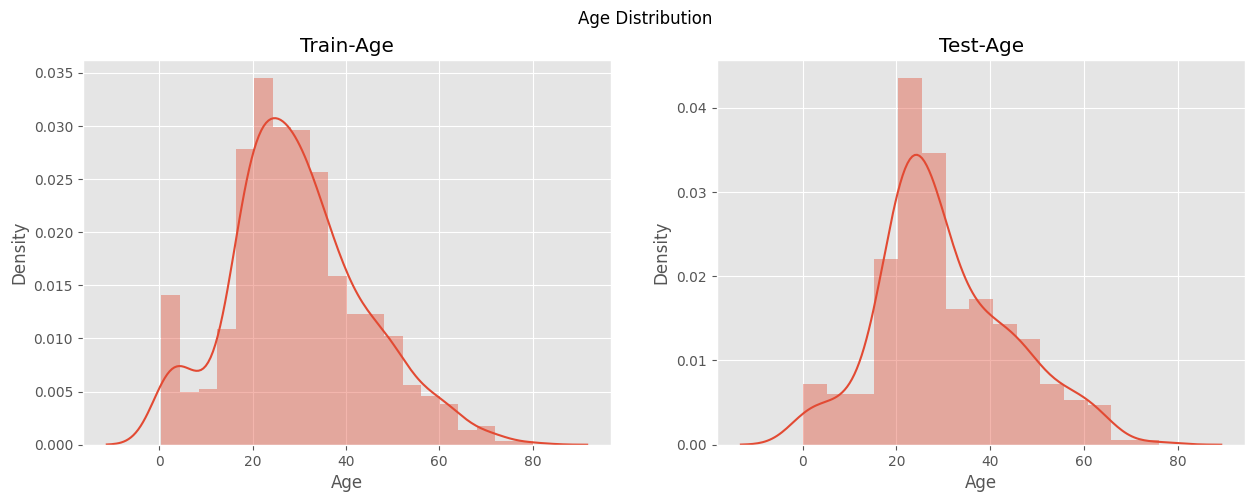

In [9]:
# Distribution for both train and test age
plt.figure(figsize=(15,5))
plt.suptitle('Age Distribution')

plt.subplot(1,2,1)
ax = sns.distplot(train.Age)
ax.set_title('Train-Age')

plt.subplot(1,2,2)
ax = sns.distplot(test.Age)
ax.set_title('Test-Age');

- `Age` of both train and test have near similar Mean and Standard deviation
- Here we can use numpy to get the random ages between the lower and upper limit of the age distribution.
- And finally fill those random numbers with the null values in train and test.

In [10]:
# calculate random age for the missing values for train
lower_age_train = train.Age.mean() - train.Age.std()
upper_age_train = train.Age.mean() + train.Age.std()

# store into the variable train_age | give the random size 177 as total null values in Age
train_age = np.random.randint(lower_age_train, upper_age_train, 177)

# calculate random age for the missing values for test
lower_age_test = test.Age.mean() - test.Age.std()
upper_age_test = test.Age.mean() + test.Age.std()

# store into the variable test_age | give the random size 86 as total null values in Age
test_age = np.random.randint(lower_age_test, upper_age_test, 86)

In [11]:
# fill the null values in both train and test
train['Age'][train['Age'].isnull()] = train_age
test['Age'][test['Age'].isnull()] = test_age

- Fill the missing values in train[ `Embarked` ] with mode.

In [12]:
train.Embarked = train.Embarked.fillna(train['Embarked'].mode()[0])

- Fill the missing values in test[ `Fare` ] with mean.

In [13]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [14]:
## Check the null values again for both train and test
print('Train Data\n')
print(train.isna().sum())
print('-'*50)
print('\nTest Data\n')
print(test.isna().sum())

Train Data

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------------------------------------

Test Data

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


- Our data doesn't have any null values. 
- Now we can perform Exploratory Data Analysis

# Exploratory Data Analysis | Visualization

> In this part we will explore all the variable and visualize all the insights for better understanding.

In [15]:
# train.head()

#### Find Count and Ratio of Survival

1 = Survived   |  0 = Did not Survived

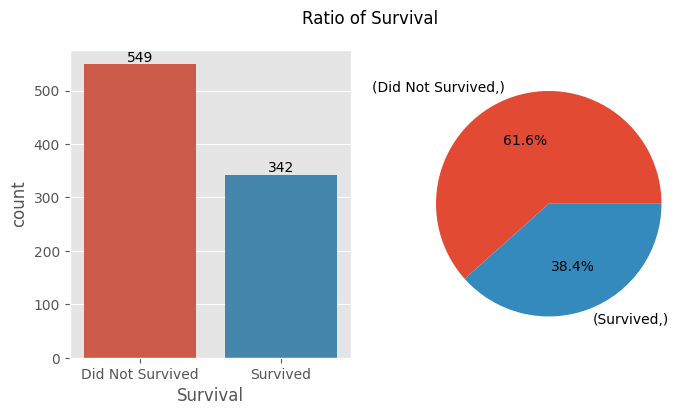

In [16]:
survival_ratio = pd.DataFrame(train['Survived'].replace({0: 'Did Not Survived', 1:'Survived'}))

plt.figure(figsize=(8,4))
plt.suptitle('Count and Ratio of Survival')

# # subplot 1 for the countplot
plt.subplot(1,2,1)
ax = sns.countplot(data=survival_ratio, x='Survived')
ax.set_xlabel('Survival')
# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

# subplot 2 for pie chart
plt.subplot(1,2,2)
survival_ratio.value_counts().plot.pie(autopct='%.1f%%');

- As we can see that overall 342 people have survived which is 38.4% out of total passengers.

### Total passengers by `Pclass`

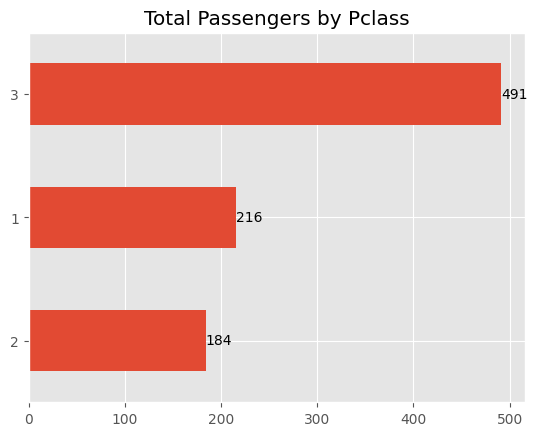

In [17]:
ax = train['Pclass'].value_counts().plot.barh(title='Total Passengers by Pclass')
ax.invert_yaxis();
# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

- Here we can see `Pclass` 3 had the highest number of passengers

In [18]:
# let's create function get the survival percentage [ this will be used by other coloumns also ]
def survival_perc(col):
    return (
    train.groupby([col, 'Survived']).count()['PassengerId'] \
    .groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)) \
    .rename('Survival-Percentage').reset_index() )

### Survival by `Pclass`

In [19]:
survival_perc('Pclass')

,Pclass,Survived,Survival-Percentage
0,1,0,37.04
1,1,1,62.96
2,2,0,52.72
3,2,1,47.28
4,3,0,75.76
5,3,1,24.24


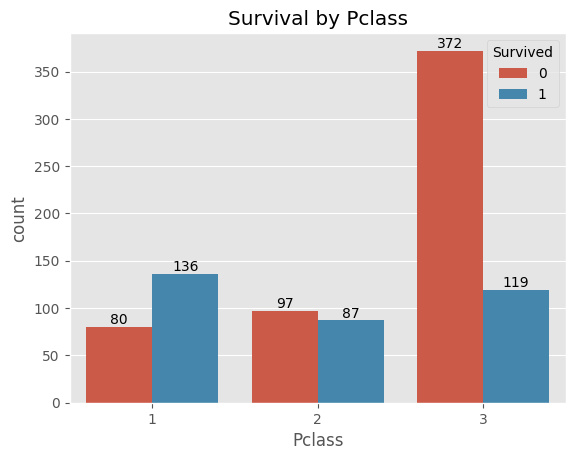

In [20]:
# visualize the plot
ax = sns.countplot(data=train, x='Pclass', hue='Survived')
ax.set_title('Survival by Pclass');
# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

- Based on the Pclass we can conclude that Pclass 1 have had highest chance of Survival.
- Pclass 3 had the lowest survival chance and the chances of Pclass 2 is between Pclass 1 and Pclass 3

### Survival by `Gender`

In [21]:
survival_perc('Sex')

,Sex,Survived,Survival-Percentage
0,female,0,25.80
1,female,1,74.20
2,male,0,81.11
3,male,1,18.89


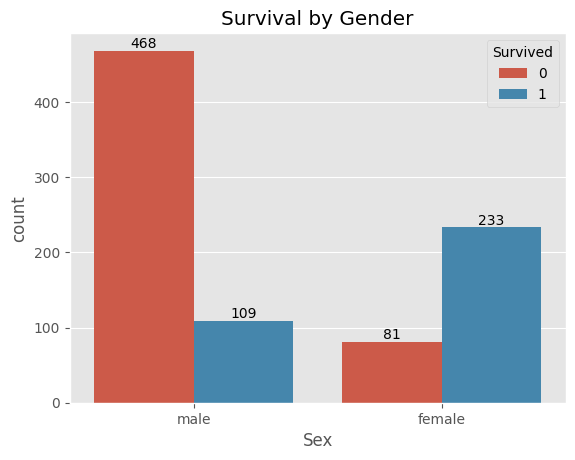

In [22]:
ax = sns.countplot(data=train, x='Sex', hue='Survived')
ax.set_title('Survival by Gender');
# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

- Based on the Gender we can conclude that Female passengers have survived the most.

### Survival by `Embarked`

- C = Cherbourg, Q = Queenstown, S = Southampton

In [23]:
survival_perc('Embarked')

,Embarked,Survived,Survival-Percentage
0,C,0,44.64
1,C,1,55.36
2,Q,0,61.04
3,Q,1,38.96
4,S,0,66.10
5,S,1,33.90


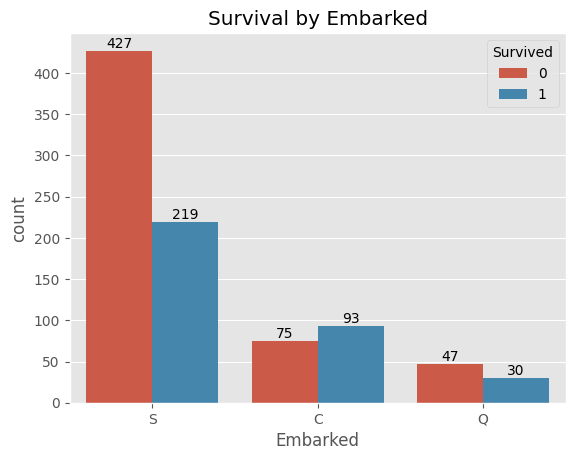

In [24]:
ax = sns.countplot(data=train, x='Embarked', hue='Survived')
ax.set_title('Survival by Embarked');

# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

- Based on the `Embarked` we can conclude that people who are belong to *Southampton* died the most because of the highest population. survival rate 33.90 %
- People belong to *Cherbourg* were survived the most with the survival rate of 55.36 %
- People belong to *Queenstown* had the survival rate of 38% also their population were lower than other Embarkation(Ports)

### Distribution of `Age` based on `Survived`

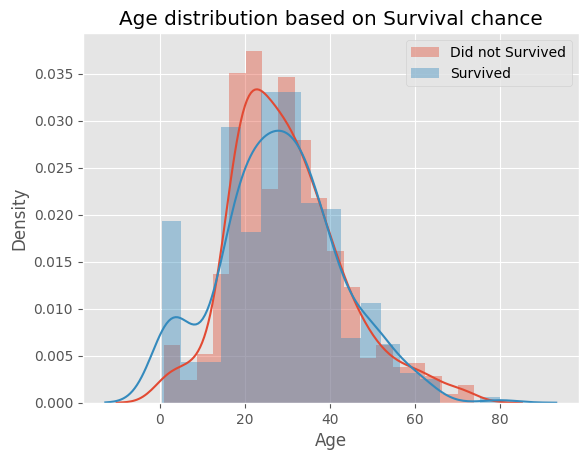

In [25]:
sns.distplot(train['Age'][train['Survived']==0], label='Did not Survived')
sns.distplot(train['Age'][train['Survived']==1], label='Survived')
plt.title('Age distribution based on Survival chance')
plt.legend();

- First of all it is a Non-Symmetric Bimodal Distribution 
- Based on the plot we can conclude that most of the passengers were around 20 to 40 years old out of total passengers on the ship
- The chances of survival is also more those people who are between adult and middle aged.
- We can also noticed that most of the children were survived during the incident. 

### Ditribution of `Fare` vs `Survived`

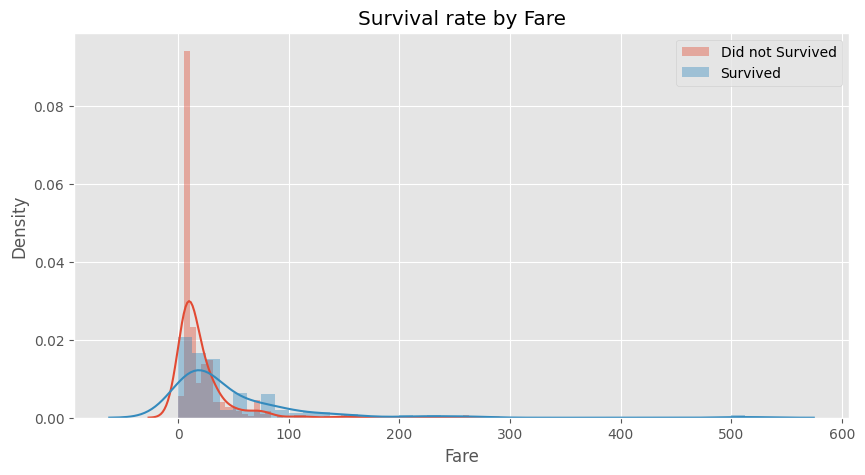

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(train[train['Survived'] == 0] ['Fare'], label=('Did not Survived'))
sns.distplot(train[train['Survived'] == 1] ['Fare'], label=('Survived'))
plt.title('Survival rate by Fare')
plt.legend();

- Based on the plot we can say that the `Fare` column is a right skewed distribution and as it goes there can be possible outlers let's find out by box plot
- As soon as the `Fare` is getting high, the `Survival` chance is also getting higher.

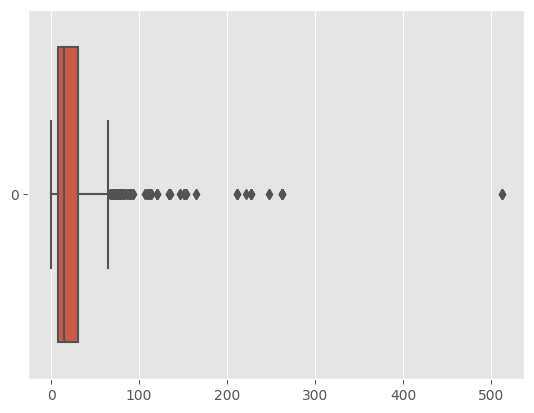

In [27]:
# find outliers for fare
plt.figure(figsize=(9,4))
sns.boxplot(train.Fare, orient='h');

- There are lot's of outliers in the `Fare` column.

### Ticket `Fare` by `Pclass`

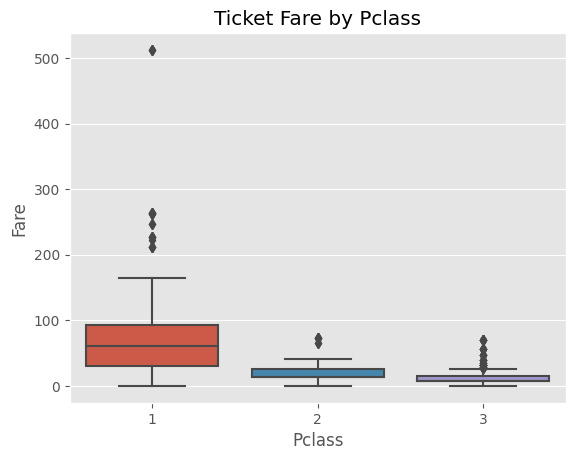

In [28]:
ax=sns.boxplot(data=train, x='Pclass', y='Fare')
ax.set_title('Ticket Fare by Pclass');

- The first class tickets are the most costly beased on the data.
- But there aren't much difference between second class and third class.
- Also we have seen that the `Survival` chances in Second class were almost **50 % higher** than that of First Class.

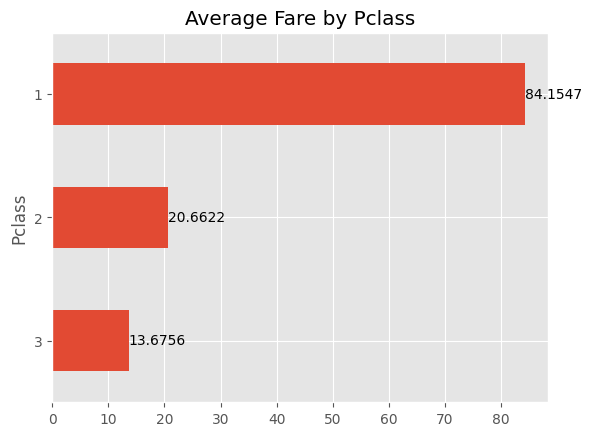

In [29]:
# find out the average Fare by each Pclass
ax = train.groupby('Pclass')['Fare'].mean().plot.barh(title='Average Fare by Pclass')
ax.invert_yaxis();

# Add Data lebel for each bar
for container in ax.containers:
    ax.bar_label(container)

In [30]:
# No. of sibilings and spouces..
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
# No. of parents and childes..
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- Based on the families count we can say that most of the passengers were travelling alone.

# Outliers Analysis

- For the `Age` Column : As the `Age` is almost normally distributed we can use the Z score method to handle the outliers
- For the `Fare` Column : It is Heavily Right Skewed. We can use IQR method for this one.

In [32]:
train[['Age', 'Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.284141,13.546245,0.42,20.0000,28.0000,37.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- Age range is starting from 0.42 (means 4months old child) to 80
- Fare range is 0 - 512 (USD)

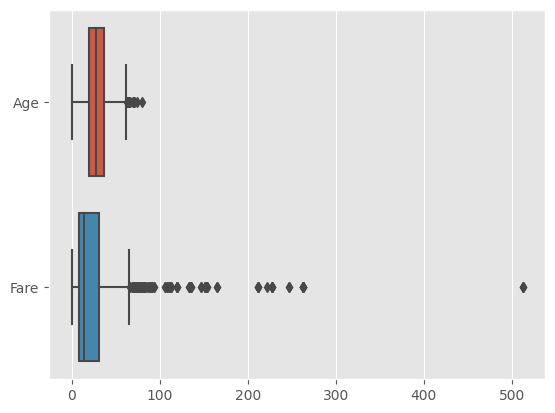

In [33]:
sns.boxplot(train[['Age', 'Fare']], orient='h');

- Based on the box plot we can see there are too many outliers in the Fare column specially.
- Let's find out the exact values of both of the column.

- Detecting Outliers for `Age` column.

In [34]:
def detect_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    upper_outliers = df[df[col] > upper_limit].shape[0]
    lower_outliers = df[df[col] < lower_limit].shape[0]
    

    return {
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit,
        'Total outliers in upper side': upper_outliers,
        'Total outliers in lower side': lower_outliers
    }
    

In [35]:
detect_outliers(train, 'Age')

{'Lower Limit': -5.5,
 'Upper Limit': 62.5,
 'Total outliers in upper side': 15,
 'Total outliers in lower side': 0}

In [36]:
# detect outliers in test
detect_outliers(test,'Age')

{'Lower Limit': -3.5,
 'Upper Limit': 64.5,
 'Total outliers in upper side': 2,
 'Total outliers in lower side': 0}

- Let's see the average Survival chance of those passengers with age above 62.5

In [37]:
train[train['Age'] > 62.5 ]['Survived'].mean()

0.2

- As we can see the Survival Chance of the older passengers (age above 62.5) is approximately 20%
- At this point we can Cap those outliers with the upper limit. [Because there are no outliers in the lower size]

In [38]:
# let's create a function for capping outliers.
def cap_ouliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)

    df[col] = np.where(
        df[col]>upper_limit, upper_limit,
              df[col]
        )

In [39]:
cap_ouliers(train, 'Age')

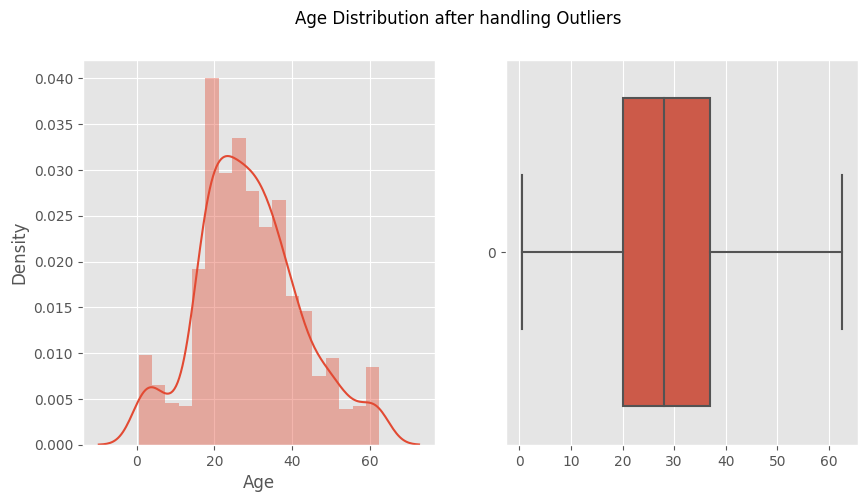

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle('Age Distribution after handling Outliers')
sns.distplot(train['Age'], ax=ax1)
sns.boxplot(train['Age'], orient='h', ax=ax2);

- Cap Outliers for test as well

In [41]:
cap_ouliers(test, 'Age')

- Now Detect and Cap outliers for `Fare` column

In [42]:
detect_outliers(train, 'Fare')

{'Lower Limit': -26.724,
 'Upper Limit': 65.6344,
 'Total outliers in upper side': 116,
 'Total outliers in lower side': 0}

In [43]:
cap_ouliers(train, 'Fare')
cap_ouliers(test, 'Fare')

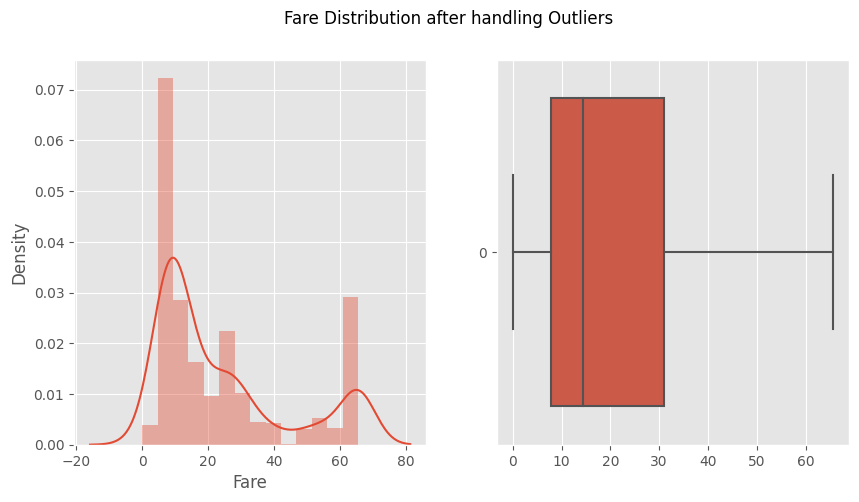

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle('Fare Distribution after handling Outliers')
sns.distplot(train['Fare'], ax=ax1)
sns.boxplot(train['Fare'], orient='h', ax=ax2);

# Feature Engineering and Transformation


> Add `Family` Column   ||  Travelling with family = 1 else 0

In [45]:
train['Family'] = train.apply(lambda row: 1 if row['SibSp'] + row['Parch'] > 0 else 0, axis=1)
test['Family'] = test.apply(lambda row: 1 if row['SibSp'] + row['Parch'] > 0 else 0, axis=1)

In [46]:
train['Family'].value_counts()

0    537
1    354
Name: Family, dtype: int64

In [47]:
survival_perc('Family')

,Family,Survived,Survival-Percentage
0,0,0,69.65
1,0,1,30.35
2,1,0,49.44
3,1,1,50.56


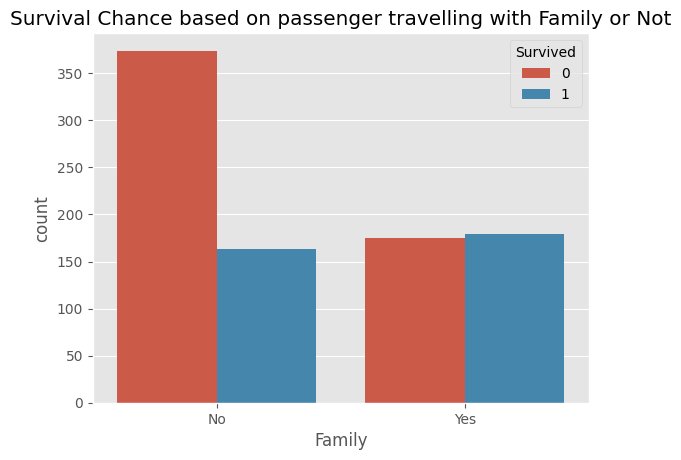

In [48]:
ax=sns.countplot(data=train, x='Family', hue='Survived')
ax.set_title('Survival Chance based on passenger travelling with Family or Not')
ax.set_xticklabels(['No', 'Yes']);

- Based on the plot we can conclude that passengers travelling with family have almost 50% chance of Survival
- Where as passengers travelling alone have only 30% chance of Survival approximately.

# Preprocessing

> Save PassengerId from test for Submission and Drop all the unnecessary features from both train and test.

In [50]:
# saving the PassengerId in passenger_ID
passengerId = test['PassengerId'].values

> Drop all the unnecessary features from both train and test..

In [51]:
train.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], inplace=True)

test.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], inplace=True)

## Feature Pre-processing
- Use `OneHotEncoder` and `make_column_transformer` from *scikit-learn* to encode and transform the **Categorical features**.
- Use `KBinsDiscretizer` from scikit-learn to binning the continuous variable `Age` and `Fare` into 5 different group

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


> let's convert `Age_band` and `Fare_band` to integer

In [53]:
# Instantiate the Categorical Features.
cat_feat = ['Embarked', 'Sex']

# Instantiate the Categorical Features.
num_feat = ['Age', 'Pclass', 'Fare']

# Instantiate both cat_trans and num_trans into preprocessors
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_feat), 
    (RobustScaler(), num_feat),
    remainder='passthrough')

## Feature and Target splitting

In [54]:
# Instantiate all the feature
X = train.drop(columns=['Survived'])

# Instantiate the target
y = train.Survived

# <font color='lightblue'>Goal of the Model</font>

Before doing anything from now, I want set a goal for this project. The problem I'm trying to solve is to create a Classification Model which is going to predict the **Survival Chnace** of `Titanic Disaster`. In the `Survived` column 1 = Survived and 0 = Did Not Survived.
- At this point, Survival is **Positive**(1) and Death is **Negative** (0).
- To reduce the error we need to improve `Recall` score of this model.
- There can be two type of error of False Prediction
    - If the model's prediction is 1 (Survived) but the Actual value was 0 (Did Not Survived) will be known as `False Positive` or `Type I Error`.
    - But the model's prediction is 0 (Did not Survived) but the Actual is 1 (Survived) will be known as `False Negative` or `Type II Error`.
    - To Improve this perticular model we need to focus on both *Precision* and *Recall* score. 
    - We need to find the perfect balance with the harmonic mean of Precision and Recall also known as F1 score.

|   |   | 1 | 0 |
|---|---|---|---|
|*Actual* |1  | True Positive | False Negative|
|*Actual* |0  | False Positive| True Negative |
|       |   | *Predicted*     | *Predicted*     |
      
- For this matter I want to select the Model which will have a good balance of `Precision` and `Recall`.

# Model Selection

- List of **Classification** Models I'm going to use for this project.
    - `Logistic Regression`
    - `Support Vector Machine (SVC)`
    - `K Neighbors Classifier`
    - `Random Forest Classifier`
    - `Gradient Boosting Classifier`
    - `XGB Classifier`
    
- First I will use **Cross Valdation** method to find the *accuracy score* and select the best model with it's default parameter.
- Then I will compare top 2-3 model and fine-tune parameters to get the best possible result.

In [59]:
# create a list of models.
models = [LogisticRegression(random_state=42),
          SVC(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state=42), 
          GradientBoostingClassifier(random_state=42),
          XGBClassifier()]

## Cross Validation

In [60]:
# create a for loop to perform cross validation for each model

for model in models:
    # Create a pipeline with preprocessor and model
    pipe = make_pipeline(preprocessor, model)
    # Instantiate the cross validation.
    cv_score = cross_val_score(pipe, X, y, cv=5, scoring='accuracy', verbose=0)
    # Calculate mean accuracy
    cv_accuracy_score = cv_score.mean()

    # Print all the results
    print('Model :',model.__class__.__name__)
    print('Cross Validation Scores', cv_score)
    print(f"Mean Accuracy score >>> {colored(round(cv_accuracy_score,4), 'green')}")
    print('-'*100)

Model : LogisticRegression
Cross Validation Scores [0.77653631 0.80898876 0.78651685 0.76404494 0.81460674]
Mean Accuracy score >>> 0.7901
----------------------------------------------------------------------------------------------------
Model : SVC
Cross Validation Scores [0.83240223 0.81460674 0.80898876 0.80337079 0.83146067]
Mean Accuracy score >>> 0.8182
----------------------------------------------------------------------------------------------------
Model : KNeighborsClassifier
Cross Validation Scores [0.78212291 0.75842697 0.83146067 0.79213483 0.79775281]
Mean Accuracy score >>> 0.7924
----------------------------------------------------------------------------------------------------
Model : RandomForestClassifier
Cross Validation Scores [0.77653631 0.80898876 0.83707865 0.78089888 0.80898876]
Mean Accuracy score >>> 0.8025
----------------------------------------------------------------------------------------------------
Model : GradientBoostingClassifier
Cross Validati

<font size="4">**Verdict**:</font>

- `Gradient Boosting Classifier` outperform every other models by giving the accuracy score of 82.49 %
- Where as `Support Vector Machine` (81.82%) and `Random Forest Classifier` (80.25%) is only other models among all which has crossed the boudary of 80%.
- Right now I will only select these TOP three model to move forward because of the best scores with default parameters.
- Rest of the models have performed similar in the range of 79 %

# Model Improvement | Optimize Parameters
> In this step I will fine-tune the parameters and find the best estimator for both of the Model.

In [61]:
# split the DataFrame for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Instantiate the parameter dict for SVC
param_grid_SVC = [
    {
        'svc__C': [0.5, 1, 10, 100],
        'svc__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'svc__kernel': ['rbf', 'poly', 'sigmoid'],
        'svc__random_state': range(0, 10)
    }
]

# Instantiate the parameter dict for Gradient Boosting 
param_grid_GB = {
    'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1, 1],
    'gradientboostingclassifier__n_estimators': [500, 1000, 2000],
    'gradientboostingclassifier__subsample': [0.5, 0.75, 1.0],
    'gradientboostingclassifier__max_depth': [1, 3, 5, 10],
    'gradientboostingclassifier__random_state': range(0, 10)
}

param_distributions_RF = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__random_state': range(0,10)
}


# pipeline for Support Vector Machine
pipe_SVC = make_pipeline(preprocessor, SVC())

# pipeline for Gradient Boosting Classifier
pipe_GB = make_pipeline(preprocessor, GradientBoostingClassifier())

# Pipeline for Random Forest Classifier
pipe_RF = make_pipeline(preprocessor, RandomForestClassifier())

### Support Vector Machine 

In [63]:
# For Model SVC
# Instantiate Grid Search CV | with 5 fold cross validation
grid_SVC = GridSearchCV(pipe_SVC, param_grid_SVC, cv=5, scoring='accuracy')

# fit the train data to grid
grid_SVC.fit(X_train, y_train)

# Print the Results
print(f"""Support Vector Machine
Best Parameters : {grid_SVC.best_params_}
Best Score : {grid_SVC.best_score_}""")

Support Vector Machine
Best Parameters : {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf', 'svc__random_state': 0}
Best Score : 0.825844577957254


In [64]:
# Make a pipeline of preprocessor and SVC and give the best parameters
clf_SVC = make_pipeline(preprocessor, SVC(random_state=0, C=10, gamma=0.1, kernel='rbf'))

# Fit the train data to the model
clf_SVC.fit(X_train, y_train)

# Prediction on test data
y_pred_SVC = clf_SVC.predict(X_test)

# Calculate the accuracy test data
print('Accuracy Score', accuracy_score(y_test, y_pred_SVC))

Accuracy Score 0.7988826815642458


### Gradient Boosting Classifier

- Used Randomized Search CV to save both time and processing power. 

In [65]:
# For Model Gradient Boosting Classifier
# Instantiate Randomized Search CV | with 5 fold cross validation
random_GB = RandomizedSearchCV(pipe_GB, param_grid_GB, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# fit the train data to grid
random_GB.fit(X_train, y_train)

# Print the result.
print(f"""Gradient Boosting Classifier
Best Parameters : {random_GB.best_params_}
Best Score : {random_GB.best_score_}
""")

Gradient Boosting Classifier
Best Parameters : {'gradientboostingclassifier__subsample': 0.75, 'gradientboostingclassifier__random_state': 5, 'gradientboostingclassifier__n_estimators': 500, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__learning_rate': 0.01}
Best Score : 0.8342657342657341



In [66]:
# Make pipeline for Gradient Boosting Classifier and impute the best parameters
clf_GB = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=5, learning_rate=0.01, max_depth=3, 
                                    n_estimators=500, subsample=0.75))
# Fit the train data to the model
clf_GB.fit(X_train, y_train)

# Prediction on test data
y_pred_GB = clf_GB.predict(X_test)

# Calculate the accuracy on test data
print('Accuracy Score', accuracy_score(y_test, y_pred_GB))

Accuracy Score 0.8156424581005587


### Random Forest Classifier

In [68]:
# For Model Random Forest Classifier
# Instantiate Randomized Search CV | with 5 fold cross validation
random_RF = RandomizedSearchCV(pipe_RF, param_distributions=param_distributions_RF,
                               cv=5, scoring='accuracy', n_iter=10, random_state=42)

# fit the train data to grid
random_RF.fit(X_train, y_train)

# Print the result.
print(f"""Random Forest Classifier
Best Parameters : {random_RF.best_params_}
Best Score : {random_RF.best_score_}
""")

Gradient Boosting Classifier
Best Parameters : {'randomforestclassifier__random_state': 2, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10}
Best Score : 0.8216093765389539



In [69]:
# Make a pipeline of preprocessor and Random Forest Classifier and give the best parameters
clf_RF = make_pipeline(preprocessor, RandomForestClassifier(
    n_estimators=50, min_samples_split=10, min_samples_leaf=2,
    max_features='log2', max_depth=10, random_state=2
))

# Fit the train data to the model
clf_RF.fit(X_train, y_train)

# Prediction on test data
y_pred_RF = clf_RF.predict(X_test)

# Calculate the accuracy on test data
print('Accuracy Score', accuracy_score(y_test, y_pred_RF))

Accuracy Score 0.8212290502793296


### Results
- Let's see the Classification Report of all three models that we have tested.

In [70]:
print(f"""
Support Vector Machine
{classification_report(y_test, y_pred_SVC)}
{'-'*75}
Gradient Boosting Classifier
{classification_report(y_test, y_pred_GB)}
{'-'*75}
Random Forest Classifier
{classification_report(y_test, y_pred_RF)}
{'-'*75}""")


Support Vector Machine
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

---------------------------------------------------------------------------
Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

---------------------------------------------------------------------------
Random Forest Classifier
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
       

<font size=4>Insights</font>

- Here we can see that the `Random Forest Classifier` have given us the best result. With the accuracy score of 82.12%.
- Where as `Gradient Boosting Classifier` gave us 81.56 (approx.. 82%) and `Support Vector Machine` gave us 79.88% (approx.. 80%)
- Let's Create Confusion Matrix and Compare `Gradient Boosting Classifier` and `Random Forest Classifier`.

# Confusion Metrix

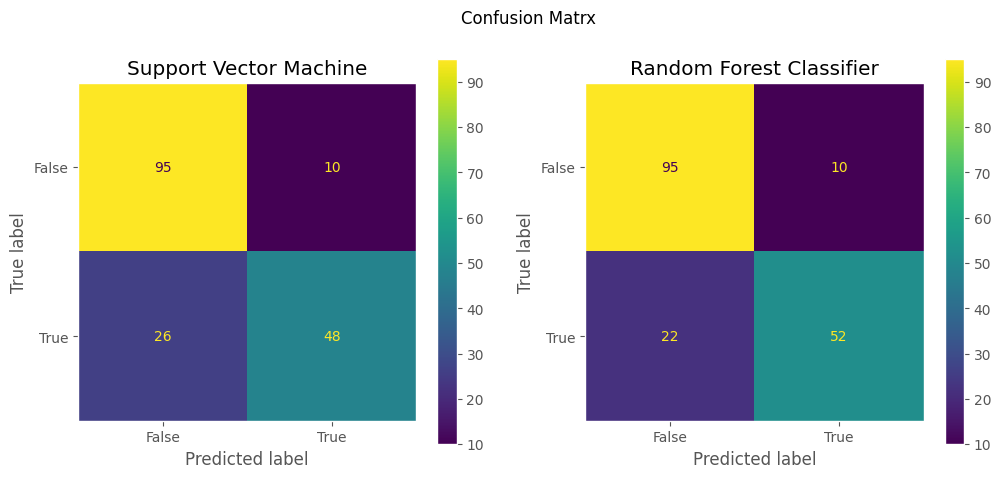

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Confusion Matrx')
ax[0].set_title("Support Vector Machine")
ax[1].set_title("Random Forest Classifier")

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_SVC),
    display_labels=[False, True,]
).plot(ax=ax[0])
ax[0].grid(False)

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_RF),
    display_labels=[False, True]
).plot(ax=ax[1])
ax[1].grid(False);

<font size=4>Insights</font>

- Both of the Model have predicted 95 *Deaths* correctly.
- Where as for *Survived* `Random Forest Classifier` (52) have predicted 4 more observation as correctly than `Gradient Boosting Classifier` (48).
- Both of the Model have wrongly predicted `False Positive` or ***Type I Error*** as 10 : Means 10 such observation where models predicted them Survived but the actual was not.
- For `False Negative` or ***Type II Error*** `Random Forest Classifier` (22) have predicted 4 less wrong prediction than `Support Vector Classifier` (26).

<font size=4>Verdict</font>

- Based on the Analysis `Random Forest Classifier` stand out as the best model by having more correct prediction and less wrong prediction than `Gradient Boosting Classifier`.

# Highlights of Insights:

1. **Female** passengers had higher chances of **survival**.
2. The ticket fare for **Pclass 1** was much higher than for other classes, and passengers from Pclass 1 had higher chances of **survival**.
3. The difference in ticket fare between Pclass 2 and Pclass 3 was not very large (*on average, approximately 7 USD*), but **Pclass 2** had almost a **50% higher** survival rate **than Pclass 3**.
4. The survival rate was *higher* among **children**, **adults**, and **middle-aged passengers**.
5. Passengers **traveling with family** had higher chances of survival.
6. Passengers who embarked from **Cherbourg** had the highest survival rate.
7. **Pclass 3** had the largest number of passengers but the lowest survival rate.